## Imports and Loading data

In [11]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib
sns.set_theme(style="whitegrid")
matplotlib.rcParams["figure.figsize"] = (7,5)
matplotlib.rcParams["legend.framealpha"] = 1
matplotlib.rcParams["legend.frameon"] = True

MEDIUM_SIZE = 12
BIGGER_SIZE = 16

# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

def info(df, n=2, c=1):
    if c: print(list(df.columns))
    print('df Shape: ',df.shape)
    return df.head(n)

In [12]:
df_train = pd.read_csv('train.csv')

## Exploratory Data Analysis

In [13]:
info(df_train)

['id', 'target', 'day', 'month', 'duration', 'contactId', 'age', 'gender', 'job', 'maritalStatus', 'education', 'creditFailure', 'accountBalance', 'house', 'credit', 'contactType', 'numberOfContacts', 'daySinceLastCampaign', 'numberOfContactsLastCampaign', 'lastCampaignResult']
df Shape:  (31480, 20)


,id,target,day,month,duration,contactId,age,gender,job,maritalStatus,education,creditFailure,accountBalance,house,credit,contactType,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign,lastCampaignResult
0,432148809,no,27,may,166,623,30,female,worker,married,highSchool,no,-202,no,no,unknown,2,NaN,0,unknown
1,432184318,no,26,oct,183,1992,42,female,manager,married,uniGraduated,no,2463,no,no,cellPhone,2,NaN,0,unknown


### Checking datatype of each column and null values

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31480 entries, 0 to 31479
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            31480 non-null  int64  
 1   target                        31480 non-null  object 
 2   day                           31480 non-null  int64  
 3   month                         31480 non-null  object 
 4   duration                      31480 non-null  int64  
 5   contactId                     31480 non-null  int64  
 6   age                           31480 non-null  int64  
 7   gender                        31480 non-null  object 
 8   job                           31480 non-null  object 
 9   maritalStatus                 31480 non-null  object 
 10  education                     31480 non-null  object 
 11  creditFailure                 31480 non-null  object 
 12  accountBalance                31480 non-null  int64  
 13  h

In [15]:
df_train.isna().sum()

id                                  0
target                              0
day                                 0
month                               0
duration                            0
contactId                           0
age                                 0
gender                              0
job                                 0
maritalStatus                       0
education                           0
creditFailure                       0
accountBalance                      0
house                               0
credit                              0
contactType                         0
numberOfContacts                    0
daySinceLastCampaign            25742
numberOfContactsLastCampaign        0
lastCampaignResult                  0
dtype: int64

<li> There is a significant amount of null values present in attribute "daySinceLastCampaign"

### Checking for duplicate values in training data

In [16]:
df_train.duplicated().sum()

0

### Statistical sumamry of data

In [17]:
df_train.describe(include='all')

,id,target,day,month,duration,contactId,age,gender,job,maritalStatus,education,creditFailure,accountBalance,house,credit,contactType,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign,lastCampaignResult
count,3.148000e+04,31480,31480.000000,31480,31480.000000,3.148000e+04,31480.000000,31480,31480,31480,31480,31480,31480.000000,31480,31480,31480,31480.000000,5738.000000,31480.000000,31480
unique,NaN,2,NaN,12,NaN,NaN,NaN,2,12,3,4,2,NaN,2,2,3,NaN,NaN,NaN,4
top,NaN,no,NaN,may,NaN,NaN,NaN,male,worker,married,highSchool,no,NaN,yes,no,cellPhone,NaN,NaN,NaN,unknown
freq,NaN,27780,NaN,9514,NaN,NaN,NaN,15770,6781,19002,16188,30925,NaN,17503,26477,20353,NaN,NaN,NaN,25746
mean,4.321650e+08,NaN,15.799015,NaN,258.498380,3.464717e+07,40.935737,NaN,NaN,NaN,NaN,NaN,1348.535133,NaN,NaN,NaN,2.779670,225.272395,0.584339,NaN
std,1.304725e+04,NaN,8.323251,NaN,256.576891,2.011538e+07,10.629198,NaN,NaN,NaN,NaN,NaN,2974.355578,NaN,NaN,NaN,3.139269,116.488328,2.469742,NaN
min,4.321423e+08,NaN,1.000000,NaN,0.000000,6.230000e+02,18.000000,NaN,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN
25%,4.321536e+08,NaN,8.000000,NaN,104.000000,1.709904e+07,33.000000,NaN,NaN,NaN,NaN,NaN,70.000000,NaN,NaN,NaN,1.000000,133.000000,0.000000,NaN
50%,4.321650e+08,NaN,16.000000,NaN,180.000000,3.468141e+07,39.000000,NaN,NaN,NaN,NaN,NaN,442.000000,NaN,NaN,NaN,2.000000,195.000000,0.000000,NaN
75%,4.321762e+08,NaN,21.000000,NaN,320.000000,5.204811e+07,48.000000,NaN,NaN,NaN,NaN,NaN,1410.000000,NaN,NaN,NaN,3.000000,327.000000,0.000000,NaN


### Checking how many unique values are present in each attribute
This will help us determine categorical columns and numeric attributes

In [18]:
df_train.nunique()

id                              31480
target                              2
day                                31
month                              12
duration                         1455
contactId                       31475
age                                76
gender                              2
job                                12
maritalStatus                       3
education                           4
creditFailure                       2
accountBalance                   6259
house                               2
credit                              2
contactType                         3
numberOfContacts                   45
daySinceLastCampaign              524
numberOfContactsLastCampaign       38
lastCampaignResult                  4
dtype: int64

In [19]:
# classifying attributes as categorical or numeric

categorical_cols = ['month', 'gender', 'job', 'maritalStatus', 
                    'education', 'creditFailure', 'house', 'credit', 'contactType', 'lastCampaignResult']

numeric_cols = df_train.select_dtypes(exclude=object).columns
print(categorical_cols)
print(numeric_cols)
len(categorical_cols)+len(numeric_cols)

['month', 'gender', 'job', 'maritalStatus', 'education', 'creditFailure', 'house', 'credit', 'contactType', 'lastCampaignResult']
Index(['id', 'day', 'duration', 'contactId', 'age', 'accountBalance',
       'numberOfContacts', 'daySinceLastCampaign',
       'numberOfContactsLastCampaign'],
      dtype='object')


19

### Univariate Analysis for numeric attributes

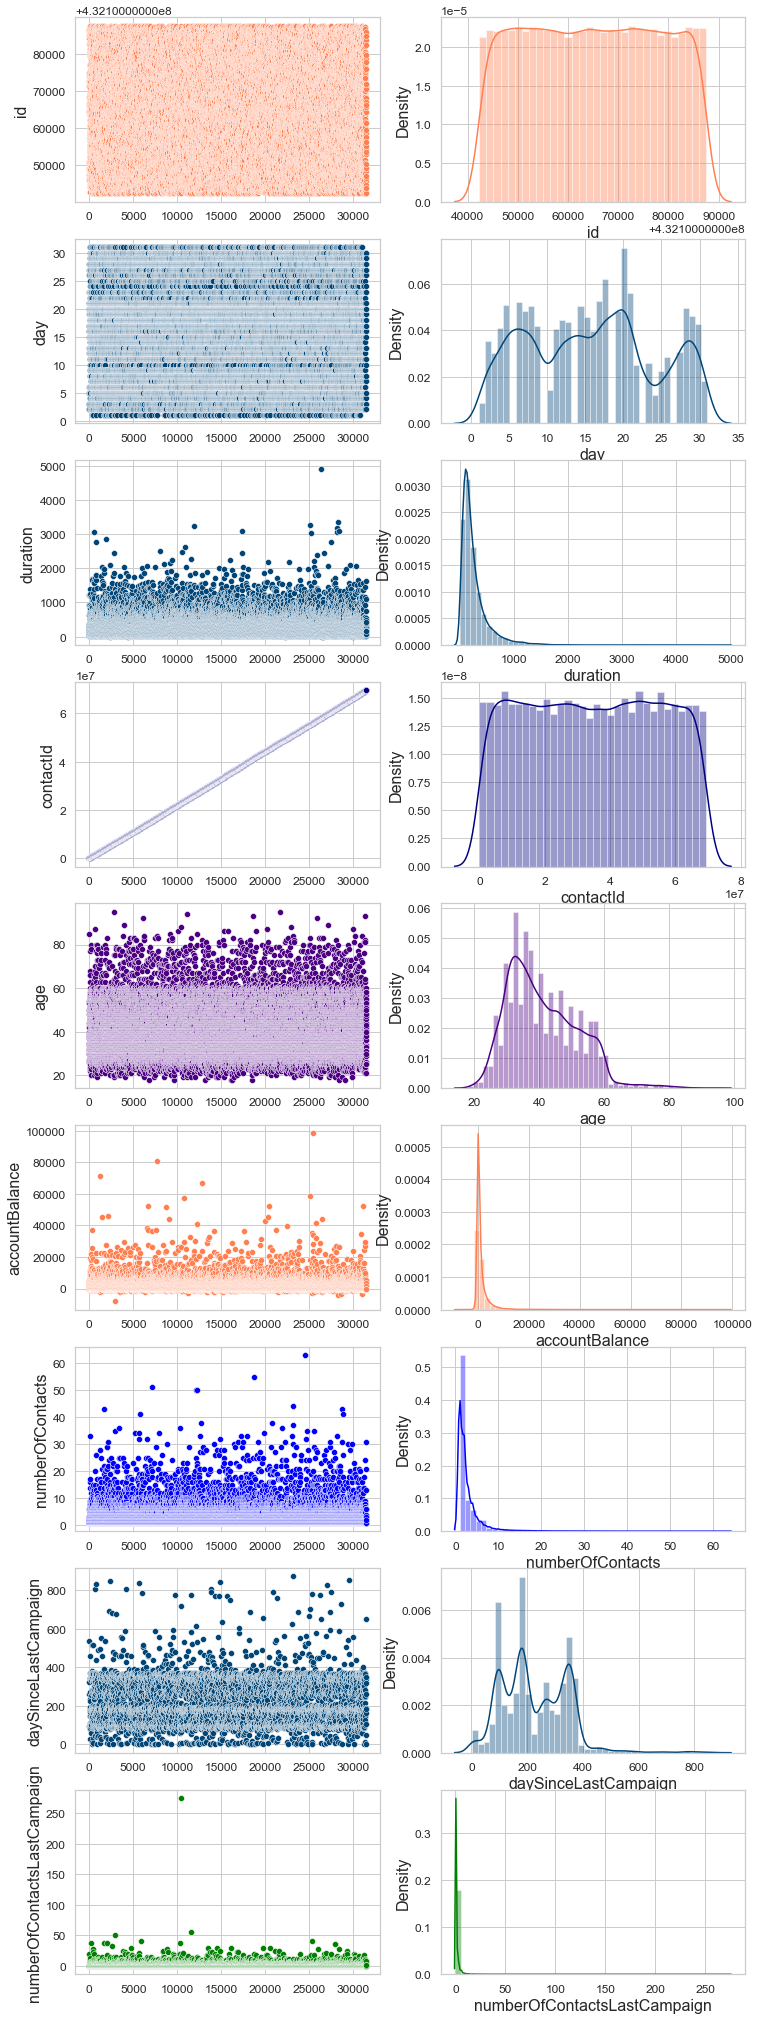

In [20]:
fig, ax = plt.subplots(len(numeric_cols),2,figsize=(12,4*len(numeric_cols)))#, layout='tight')
colors = ['navy', 'blue', 'green', '#004577', 'coral', 'indigo', '#014d4e']
for i,col in enumerate(numeric_cols):
    c = sample(colors,1)[0]
    # print(c)
    sns.scatterplot(x=df_train.index, y=df_train[col], ax=ax[i,0], color=c)
    sns.distplot(df_train[col], ax=ax[i,1], color=c)
    # ax[i,1].plot(df_train.index, df_train[col])
    # df_train[col].plot(kind='kde', ax=ax[i])
plt.show()

In [21]:
df_train[df_train['accountBalance']<0]

,id,target,day,month,duration,contactId,age,gender,job,maritalStatus,education,creditFailure,accountBalance,house,credit,contactType,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign,lastCampaignResult
0,432148809,no,27,may,166,623,30,female,worker,married,highSchool,no,-202,no,no,unknown,2,NaN,0,unknown
14,432150808,no,3,jun,21,38665,37,female,worker,married,highSchool,yes,-399,yes,yes,unknown,3,NaN,0,unknown
22,432168306,no,19,nov,300,53610,31,female,administrative,divorced,uniGraduated,no,-2,yes,no,cellPhone,1,NaN,0,unknown
26,432155457,no,8,jul,133,66210,58,female,retired,married,unknown,no,-230,no,yes,cellPhone,2,NaN,0,unknown
32,432155413,yes,8,jul,740,76903,33,male,entrepreneur,married,highSchool,no,-627,yes,yes,cellPhone,1,NaN,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31416,432161603,no,6,aug,159,69446838,56,male,services,married,highSchool,yes,-8,no,no,cellPhone,2,NaN,0,unknown
31439,432157293,no,16,jul,538,69482067,55,female,administrative,married,highSchool,no,-480,no,no,cellPhone,2,NaN,0,unknown
31446,432175842,no,20,apr,97,69489256,48,female,services,married,highSchool,no,-110,yes,no,cellPhone,2,321.0,2,other
31463,432149116,no,28,may,399,69527138,29,male,manager,single,uniGraduated,no,-158,yes,no,unknown,1,NaN,0,unknown


#### <i>Inference 1: as per above plots</i>
<li> As we can visualize from the distribution and scatter plots, there are outliers in attributes like duration, age, account balance, no of contacts, day since last campaign and number of contacts last campaign.
<li> There are comparatively fewer instances for the last week of the month(day attribute).
<li>The mode age is around 32 and average age is 40 for market survey participants
<li>Since there are outliers present in the current data, visualizing distribution will be better if we remove them

### Removing outliers from the training data 

In [22]:
# helper function to remove outliers using Inter Quantile Range method given a dataframe and list of columns to apply method on
def remove_outlier(df, col_list):
    for col in col_list:
        # print(df[col])
        q1, q3 = df[col].quantile(0.25), df[col].quantile(0.75)
        iqr = q3-q1
        lower_fence, upper_fence = q1-3.5*iqr, q3+3.5*iqr
        df_filtered = df.loc[(df[col] > lower_fence) & (df[col] < upper_fence)]
        df = df_filtered.copy()
    return df_filtered

In [23]:
# df_train2 = remove_outlier(df_train, ['duration', 'age', 'accountBalance', 'numberOfContacts', 'daySinceLastCampaign', 'numberOfContactsLastCampaign'])
# df_train2 = remove_outlier(df_train, ['duration', 'age', 'accountBalance', 'numberOfContacts', 'daySinceLastCampaign', 'numberOfContactsLastCampaign'])
df_train2 = remove_outlier(df_train, ['duration', 'age', 'accountBalance', 'numberOfContacts'])
df_train2 = df_train2[df_train['numberOfContactsLastCampaign']<=20]


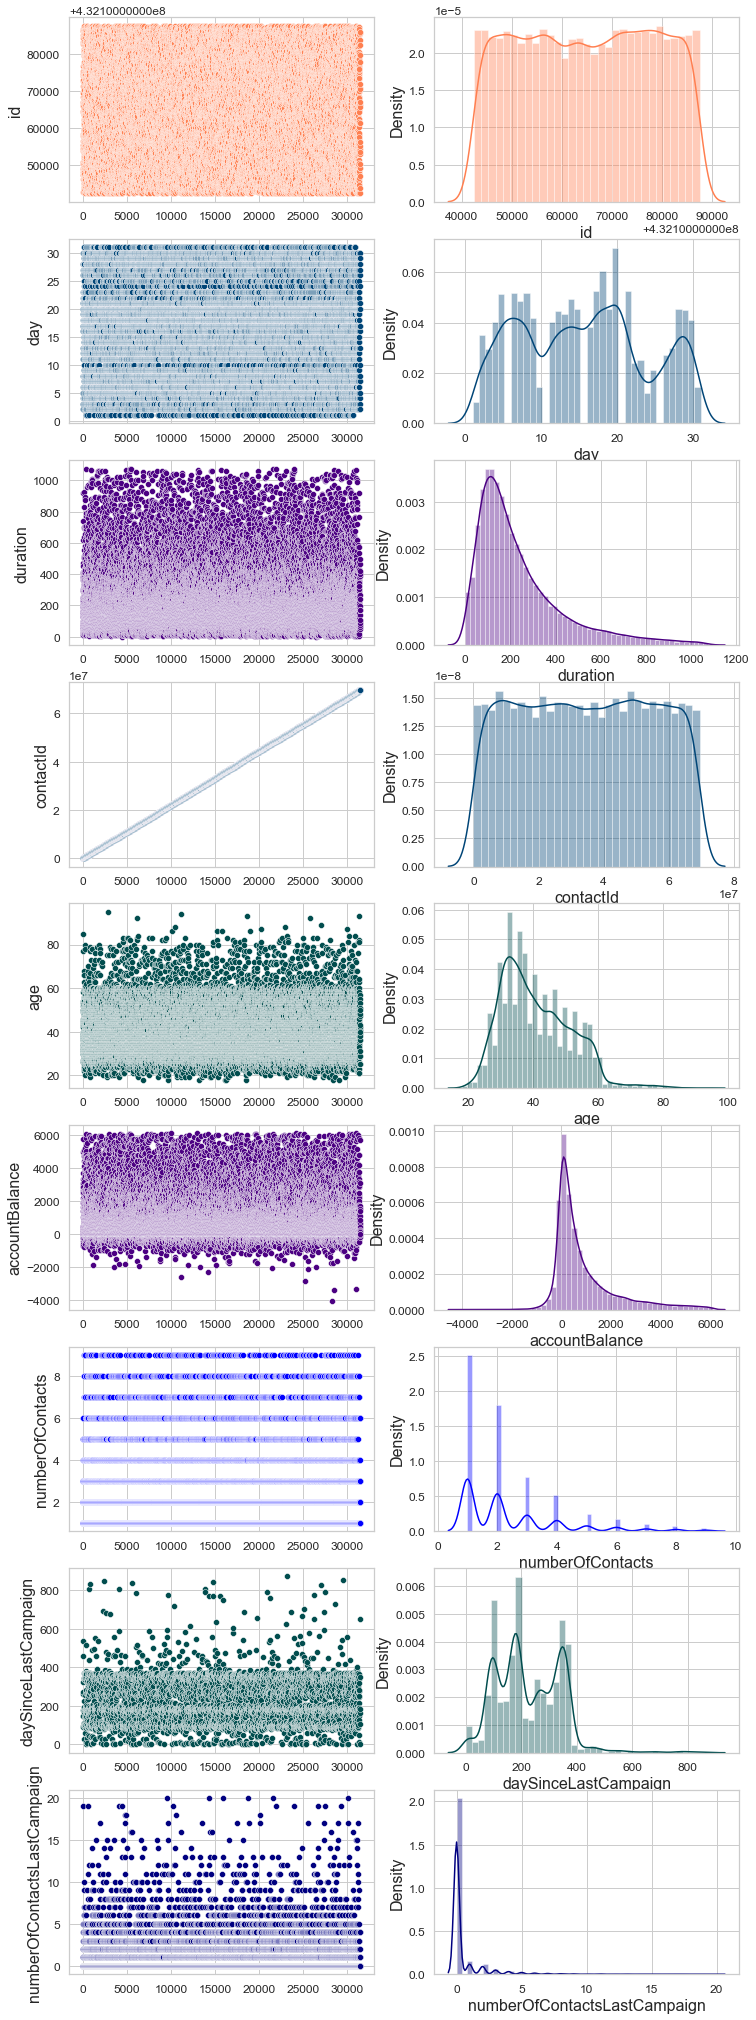

In [24]:
# plotting the data after removing outliers
fig, ax = plt.subplots(len(numeric_cols),2,figsize=(12,4*len(numeric_cols)))#, layout='tight')
colors = ['navy', 'blue', 'green', '#004577', 'coral', 'indigo', '#014d4e']
for i,col in enumerate(numeric_cols):
    c = sample(colors,1)[0]
    sns.scatterplot(x=df_train2.index, y=df_train2[col], ax=ax[i,0], color=c)
    sns.distplot(df_train2[col], ax=ax[i,1], color=c)
plt.show() 

#### <i>Inference 2: revised after removing outliers</i>
<li> Density plots are looking better after removing outliers and we can analyze the results better
<li> There are comparatively fewer instances for the third and fourth weeks of the month and more in the first and second weeks(day attribute).
<li>The mode age is around 34 as visualized form the above plot.
<li>Number of times a person was contacted in previous campaign ranges form 1 to 9.
<li> Most of the participants in this marketing campaign are contacted after 180 days or 6 months from the previous campaign.
<li>Number of contacts done for the current campaign ranges from 1 to 9, 1 being most common where as 9 being the least.
<li>Account balance for most of the participants is close to zero and positive but not zero since mode account balance close to and greater than zero
<hr>

In [25]:
# fig, ax = plt.subplots(len(numeric_cols),2,figsize=(14, 6*len(numeric_cols)), layout='tight')
# for i in range(len(categorical_cols)):
#     try:
#         col1 = categorical_cols[i+0]
#         col2 = categorical_cols[i+1]
#         sns.countplot(data=df_train, x=col1, ax=ax[i,0])
#         sns.countplot(data=df_train, x=col2, ax=ax[i,1])
#     except: pass
# plt.show()

### Univariate analysis for Categorical attributes

In [26]:
print(len(categorical_cols))
categorical_cols

10


['month',
 'gender',
 'job',
 'maritalStatus',
 'education',
 'creditFailure',
 'house',
 'credit',
 'contactType',
 'lastCampaignResult']

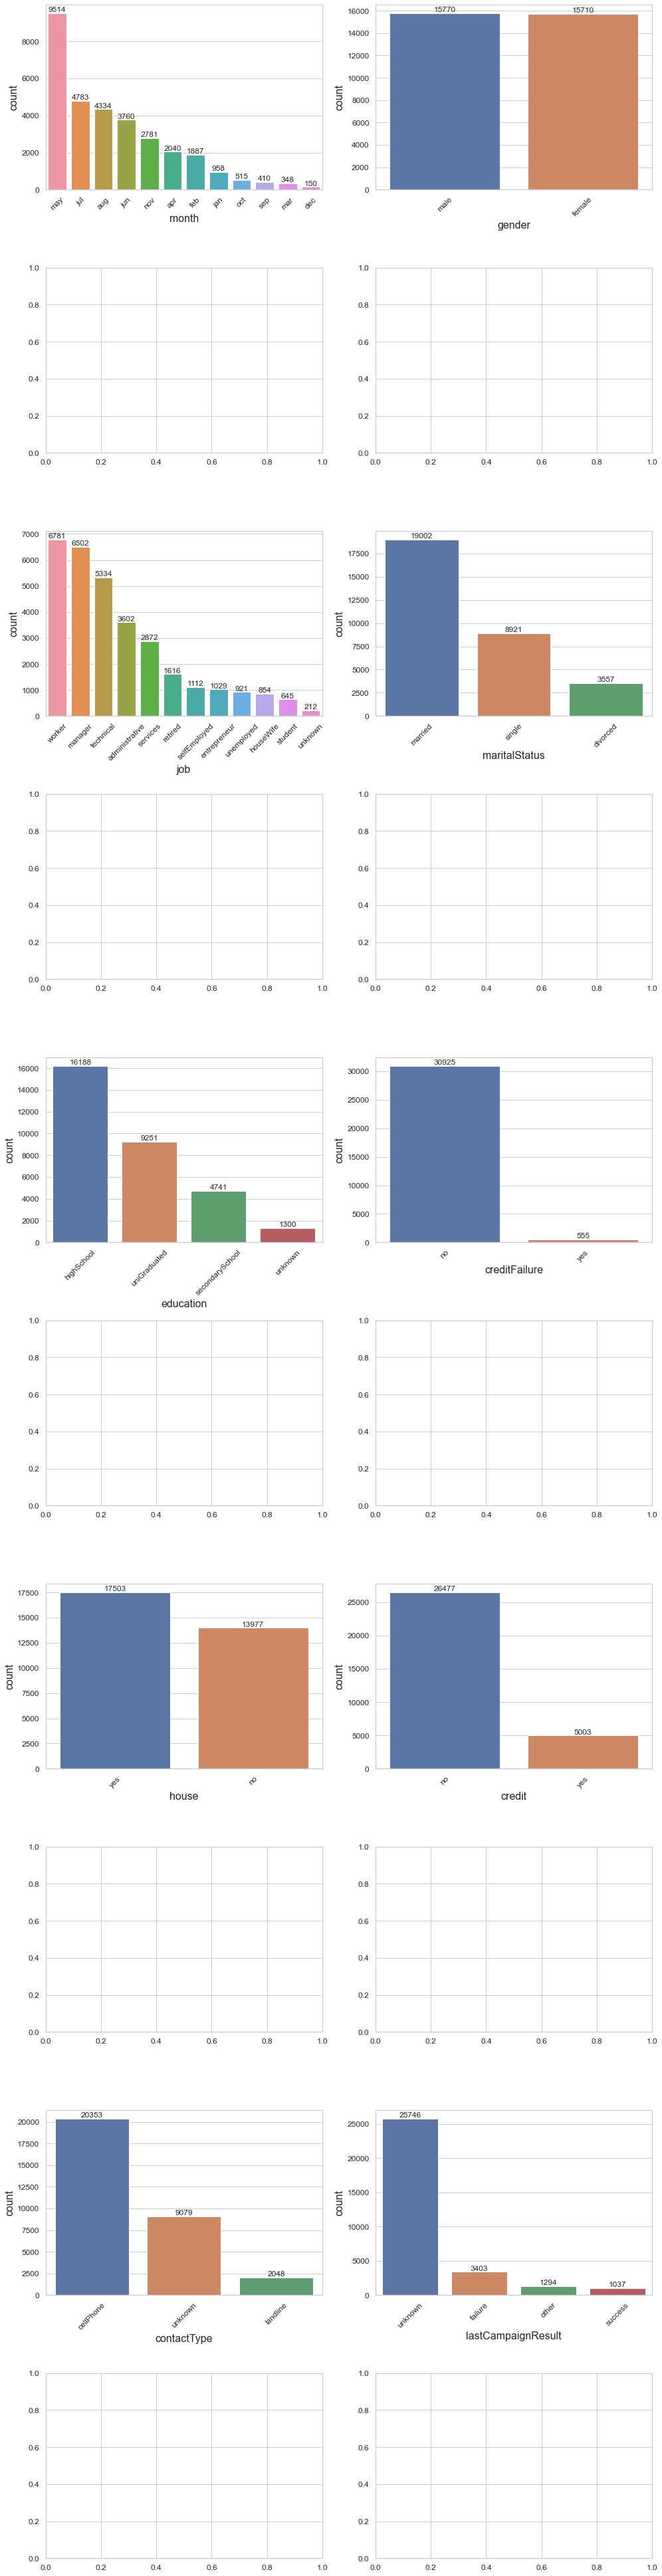

In [27]:
fig, ax = plt.subplots(len(categorical_cols),2,figsize=(14, 6*len(numeric_cols)), layout='tight')
for i in range(0,len(categorical_cols), 2):
    try:
        col1 = categorical_cols[i+0]
        col2 = categorical_cols[i+1]
        counts1 = df_train[col1].value_counts().rename_axis(col1).reset_index(name='count')
        counts2 = df_train[col2].value_counts().rename_axis(col2).reset_index(name='count')

        sns.barplot(data=counts1, x=col1, y='count', ax=ax[i,0])
        ax[i,0].bar_label(ax[i,0].containers[0])
        for tick in ax[i,0].get_xticklabels():
            tick.set_rotation(45)

        sns.barplot(data=counts2, x=col2, y='count', ax=ax[i,1])
        ax[i,1].bar_label(ax[i,1].containers[0])
        for tick in ax[i,1].get_xticklabels():
            tick.set_rotation(45)
    except: pass
plt.show()

### Plot for Target

<AxesSubplot:xlabel='target', ylabel='count'>

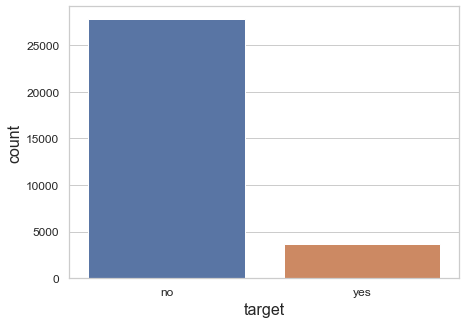

In [28]:
sns.countplot(x=df_train['target'])

<li>As we can observe from the above bar plot, very few people respond to marketing campaigns positively and most of them are not, hence the dataset is highly imbalanced.

#### <i>Inference:</i>
<li>month: most of the campaigns are conducted in the month of May, July August, etc.
<li>gender: The data is almost balanced considering the gender, since we have collected almost the same amount of data for male as that of female.
<li>job: Top 5 job categories who have participated in the survey are worker, manager, technical, service and administrative.
<li>maritalStatus: Most of the participants in the survey are married and least are divorced
<li>education: High School and University Graduates are a major chunk in the market survey data and we have less data for Secondary School
<li>creditFailure: Only 1.6% of the people on which survey was conducted defaulted on credit.
<li>house: almost equal number of surveyed people owns or does not owns a house.
<li>credit: Most of the surveyed people does not have credit
<li>contactType: Cell Phone is the most used or popular contact medium in this survey
<li>lastCampaignResult: Most of the participants in this marketing caompaing did not participate in the previous one, also out of ones that participated there are nearly three times as many failures than success in the last campaign.
<hr>

In [29]:
df_train['category'] = 'Unknown'
df_train.category[(df_train['target'] == 'yes') & (df_train['lastCampaignResult'] == 'success')] = 'Double Positive'
df_train.category[(df_train['target'] == 'yes') & (df_train['lastCampaignResult'] == 'unknown')] = 'New Positive'
df_train.category[(df_train['target'] == 'yes') & (df_train['lastCampaignResult'] == 'failure')] = 'Negative to Positive'
df_train.category[(df_train['target'] == 'no')  & (df_train['lastCampaignResult'] == 'success')] = 'Positive to Negative'
df_train.category[(df_train['target'] == 'no')  & (df_train['lastCampaignResult'] == 'unknown')] = 'New Negative'
df_train.category[(df_train['target'] == 'no')  & (df_train['lastCampaignResult'] == 'failure')] = 'Double Negative'

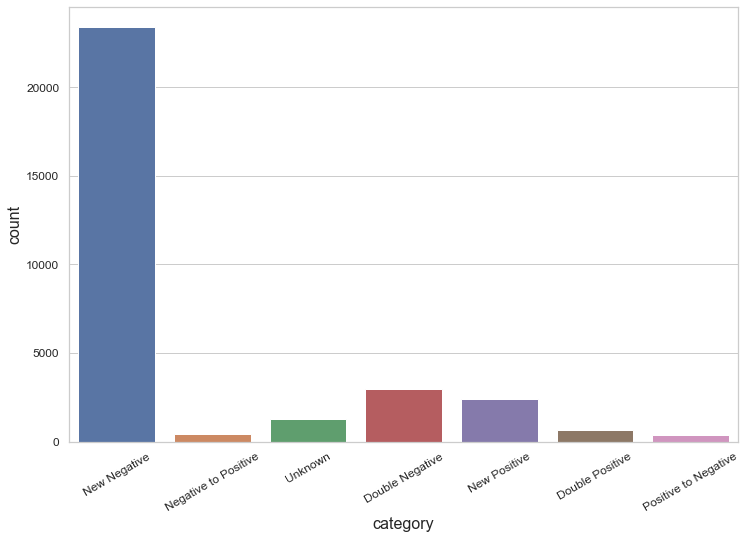

In [30]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x = 'category',data = df_train)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.show()

From the above count plot we can see that, the top three categories are negative response in current campaign and no participation in the previous one, negative response in both of the campaigns, positive response in current campaign but not participated in the previous campaign.

In [31]:
age_bins = list(range(10,110,10))
df_train['age_bins'] = pd.cut(x=df_train['age'], bins= age_bins, labels = list((str(x)+'s' for x in age_bins[:-1])))

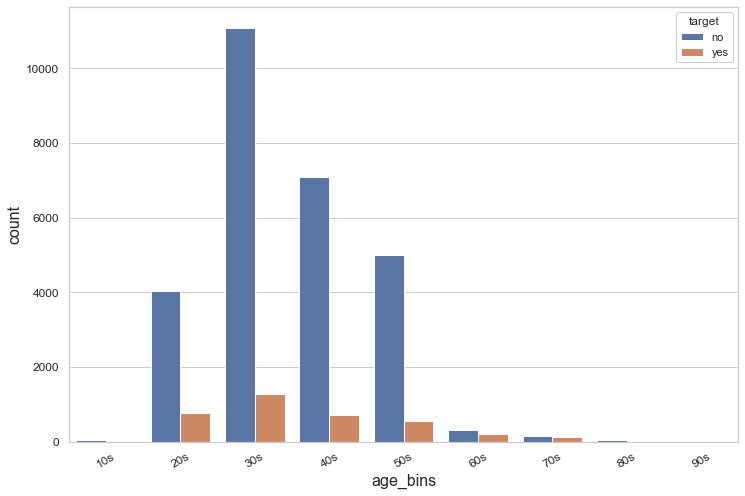

In [32]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x = 'age_bins',data = df_train, hue='target')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.show()

<li>People in thier 20s, 60s and 70s are more likely to respond more positively than negatively when compared to all other groups, i.e success rate is more in age group of 20-29, 60-69 and 70-79

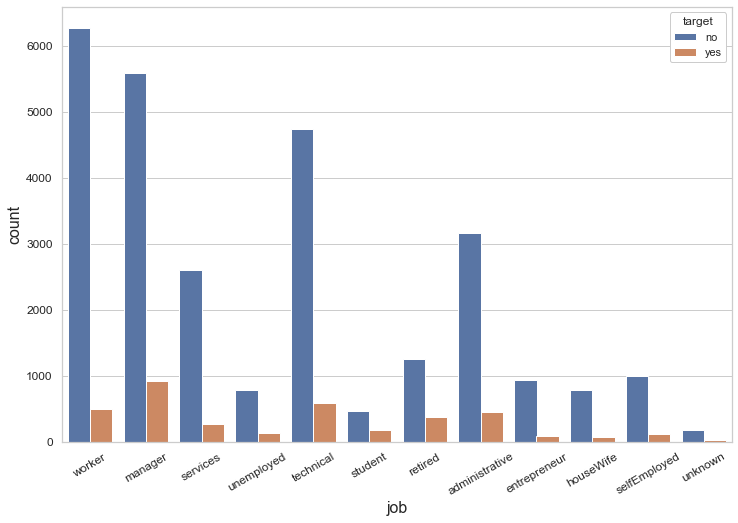

In [33]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x = 'job',data = df_train, hue='target')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.show()

<li> Comparing job type with outcome, we found that worker class is the one with least success rate
<li> Best success rate is achieved in classes like Student, retired, unemployed and administrative

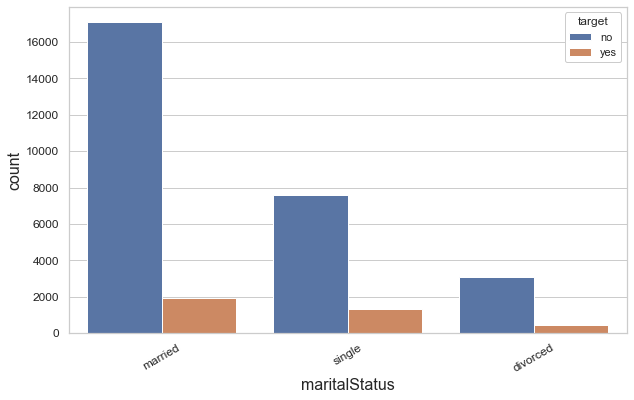

In [34]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x = 'maritalStatus',data = df_train, hue='target')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.show()

<li> Single customers tend to show postive feedback when comapred to married

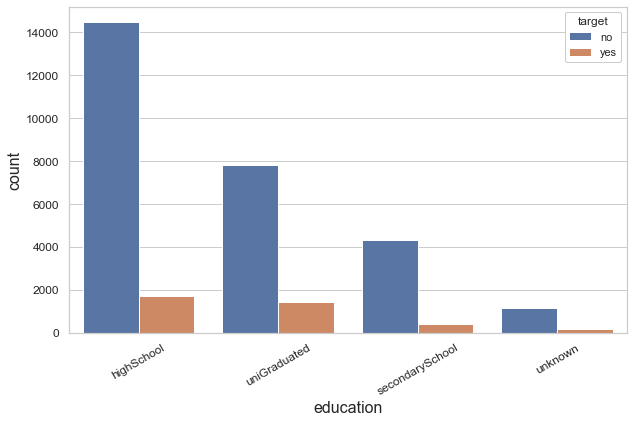

In [35]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x = 'education',data = df_train, hue='target')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.show()

<li> Here university graduates seem to be the best performing class on target while highschool seems to have lowest success rate

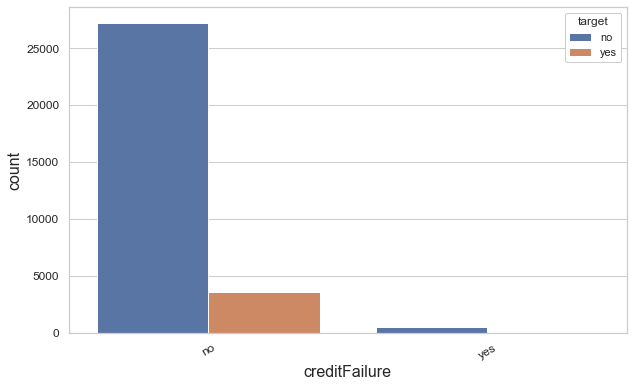

In [36]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x = 'creditFailure',data = df_train, hue='target')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.show()

<li>There are no instances where someone has defaulted in credit and responded postitively, this suggest that campaign should target people who have positive credit. 

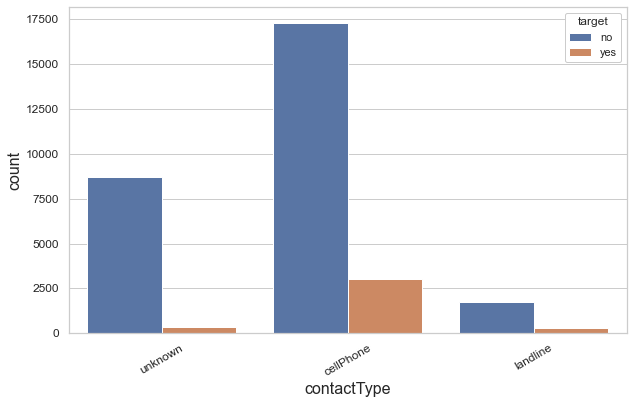

In [37]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x = 'contactType',data = df_train, hue='target')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.show()

<li>CellPhone is the best medium, is suggested by the above analysis

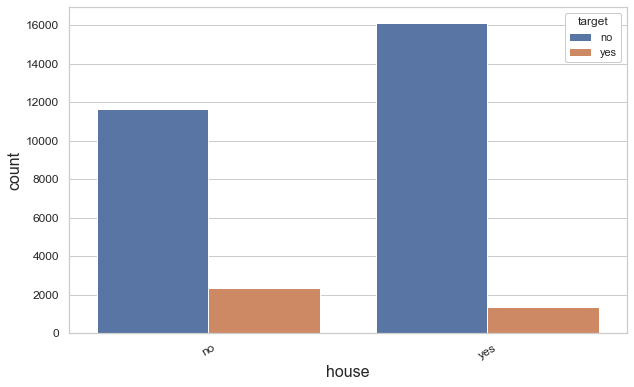

In [38]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x = 'house',data = df_train, hue='target')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.show()

<li>Pople without hosue tend to respond more positively than one with thier own houses

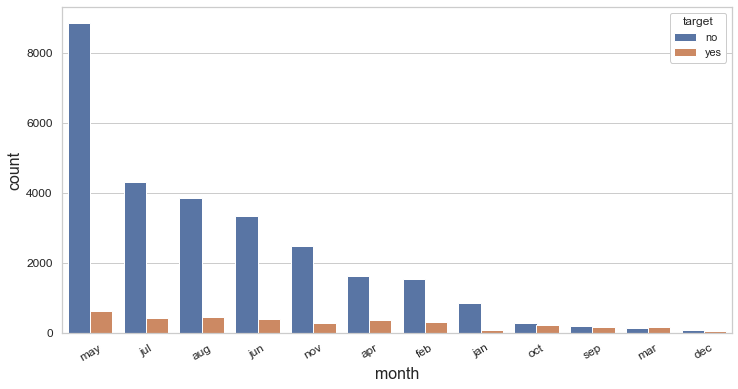

In [39]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.countplot(x = 'month',data = df_train, hue='target', order = df_train['month'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.show()

<li> From the above plot we can say that we get highest success rate during months of october, september, december
<li> March seems to be the best month because the number of positive responses is higher than negative ones
<li>Lowest success rate of marketing campaign is seem in month of may

### Correlation Analysis

In [42]:
# pre-processing for correlation analysis
#df_train['target'].unique()
df_train = pd.read_csv('train.csv')
df_train['target'] = df_train['target'].map({'yes':1, 'no':0})
df_train.drop(['id', 'contactId'], axis=1, inplace=True)
df_train2['target'] = df_train2['target'].map({'yes':1, 'no':0})
df_train2.drop(['id', 'contactId'], axis=1, inplace=True)

In [43]:
df_train2.head()

,target,day,month,duration,age,gender,job,maritalStatus,education,creditFailure,accountBalance,house,credit,contactType,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign,lastCampaignResult
0,0,27,may,166,30,female,worker,married,highSchool,no,-202,no,no,unknown,2,NaN,0,unknown
1,0,26,oct,183,42,female,manager,married,uniGraduated,no,2463,no,no,cellPhone,2,NaN,0,unknown
2,0,5,jun,227,26,female,services,single,highSchool,no,2158,yes,yes,landline,1,NaN,0,unknown
3,0,2,jun,31,34,male,unemployed,divorced,uniGraduated,yes,75,yes,no,unknown,3,NaN,0,unknown
5,0,21,may,303,37,male,technical,married,highSchool,no,5729,yes,no,unknown,3,NaN,0,unknown


In [44]:
df_train.head()

,target,day,month,duration,age,gender,job,maritalStatus,education,creditFailure,accountBalance,house,credit,contactType,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign,lastCampaignResult
0,0,27,may,166,30,female,worker,married,highSchool,no,-202,no,no,unknown,2,NaN,0,unknown
1,0,26,oct,183,42,female,manager,married,uniGraduated,no,2463,no,no,cellPhone,2,NaN,0,unknown
2,0,5,jun,227,26,female,services,single,highSchool,no,2158,yes,yes,landline,1,NaN,0,unknown
3,0,2,jun,31,34,male,unemployed,divorced,uniGraduated,yes,75,yes,no,unknown,3,NaN,0,unknown
4,0,15,may,1231,48,male,worker,married,secondarySchool,no,559,yes,no,unknown,2,NaN,0,unknown


Text(0.5, 1.0, 'Without removing outliers')

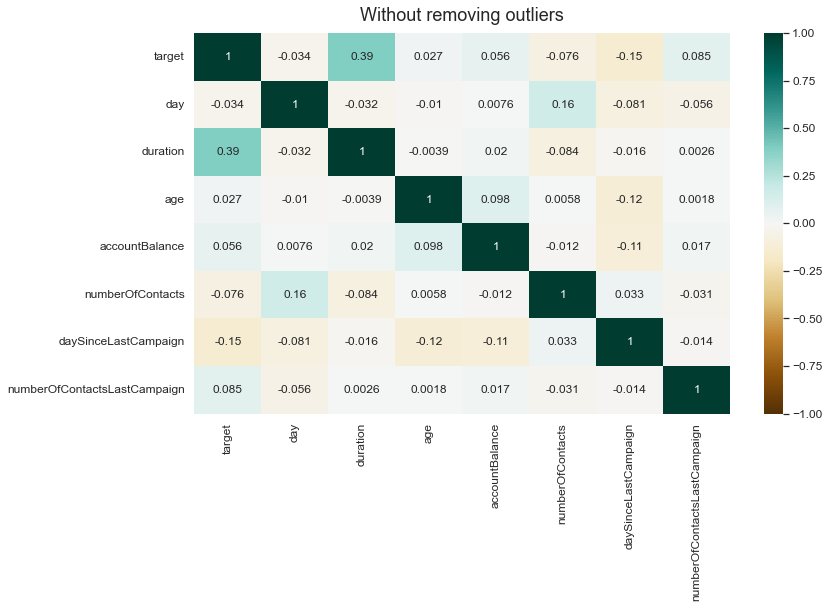

In [45]:
plt.figure(figsize=(12, 7))
heatmap = sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Without removing outliers', fontdict={'fontsize':18}, pad=12)

Text(0.5, 1.0, 'After removing outliers')

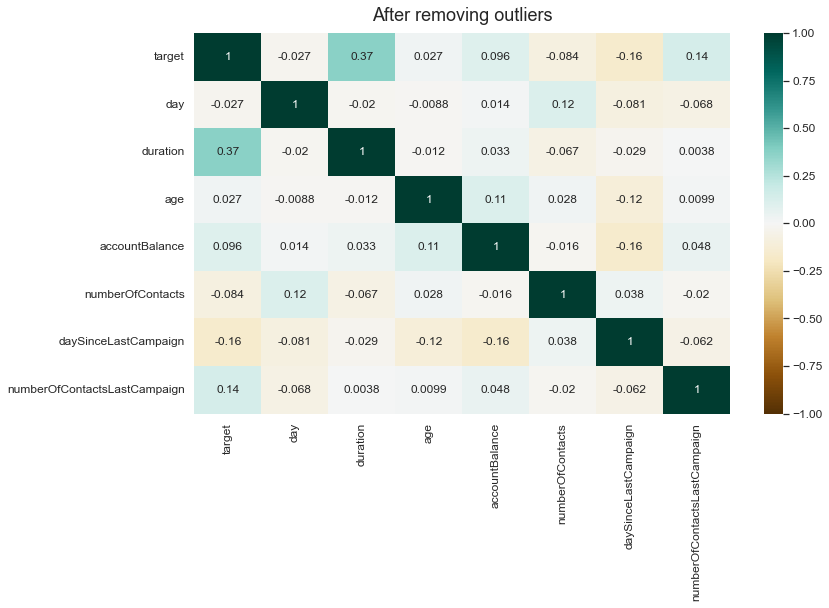

In [46]:
plt.figure(figsize=(12, 7))
heatmap = sns.heatmap(df_train2.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('After removing outliers', fontdict={'fontsize':18}, pad=12)

### <i>Inference:</i>
<li> The above correlation matrix for numeric attributes suggests that Duration has the highest positive correlation with target
<li> Account balance, No of contacts last compaign, age also have significant positive correlation
<li> No of contacts and day since last campaign has lowest negative correlation which suggests that higher no of calls may reduce the chances of aquiring a new customer, or the more recently contacted customer the more chances are that he/she will respond positively
<li>Account balance is correlated with age
<li> No of contacts last campign is correlated with no of contacts in current campaign

### Chi-Squared test to check correlation between categorical attributes

In [47]:
for col in categorical_cols:    
    CrosstabResult=pd.crosstab(index=df_train[col],columns=df_train['target'])
    ChiSqResult = chi2_contingency(CrosstabResult)
    # p-value is the Probability of H0 being True, H0 or null hypothesis assumes correlation, 
    # hence p-value > 0.05 suggests no correlation
    print(f'{col} | p-value: {np.round(ChiSqResult[1],8)}')

month | p-value: 0.0
gender | p-value: 0.27831113
job | p-value: 0.0
maritalStatus | p-value: 0.0
education | p-value: 0.0
creditFailure | p-value: 0.00022623
house | p-value: 0.0
credit | p-value: 0.0
contactType | p-value: 0.0
lastCampaignResult | p-value: 0.0


### <i>Inference:</i>
p-value is the Probability of H0 being True, H0 or null hypothesis assumes correlation, hence p-value < 0.05 suggests no correlation<br>
<li> Here, gender seems to be having highly correlated with the target when compared to other categorical variables
<li> Credit failure also seems to show some correlation but not much
<li> Here we can drop month attribute since the correlation is low and it seems to be logically correct, since month should not influence how a person reacts to campaign

## MODELING (Dataset containing outliers)

Following models are used:

1) Logistic Regression

2) RandomForest Classifier

3) AdaBoost Classifier

4) Decision Tree

In [48]:
# Retrieve the categorical feature names
df_train.shape
df_train['daySinceLastCampaign'].fillna(-1, inplace=True)
categorical_cols = [ i for i in df_train.select_dtypes(include=["object"]).columns ]

Converting the categorical variables using one hot encoding

In [49]:
df = pd.get_dummies(df_train, columns = categorical_cols[:])


In [50]:
#categorical columns are as follows:
categorical_cols[:]

['month',
 'gender',
 'job',
 'maritalStatus',
 'education',
 'creditFailure',
 'house',
 'credit',
 'contactType',
 'lastCampaignResult']

Performing Normaliazation on entire dataset using StandardScaling

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['target']), df['target'], test_size= 0.3, random_state=1)

#Perfrom standard scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Preprocessing for imbalanced dataset

In [54]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.over_sampling import SMOTE
    
print("Before under sampling: ",Counter(y_train))

# define undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)
print("After undersampling: ", Counter(y_train_under))

SMOTE = SMOTE()
# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)
print("After oversampling: ",Counter(y_train_SMOTE))




Before under sampling:  Counter({0: 19417, 1: 2619})
After undersampling:  Counter({0: 2619, 1: 2619})
After oversampling:  Counter({0: 19417, 1: 19417})


### Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,roc_auc_score
def logistic(X_train,y_train):
    
    clf = LogisticRegression(random_state=0).fit(X_train, y_train)
    from sklearn import metrics
    pred = clf.predict(X_test)
    print()
    print("Test Accuracy:",metrics.accuracy_score(y_test, pred))
    y_train_pred = clf.predict(X_train) 
    train_acc = metrics.accuracy_score(y_train, y_train_pred) 
    print("Train Accuracy:", train_acc)
    target_names = ['class 0', 'class 1']
    print("ROC AUC score: ", roc_auc_score(y_test, pred))
    print(classification_report(y_test, pred, target_names=target_names))
    print()

print("---Imabalnced Dataset---")
logistic(X_train,y_train)
print('---Under Sampling---')
logistic(X_train_under, y_train_under)
print('---Over Sampling---')
logistic(X_train_SMOTE, y_train_SMOTE)

---Imabalnced Dataset---

Test Accuracy: 0.9034307496823379
Train Accuracy: 0.9004810310401161
ROC AUC score:  0.6611343542981436
              precision    recall  f1-score   support

     class 0       0.92      0.98      0.95      8363
     class 1       0.65      0.35      0.45      1081

    accuracy                           0.90      9444
   macro avg       0.78      0.66      0.70      9444
weighted avg       0.89      0.90      0.89      9444


---Under Sampling---

Test Accuracy: 0.8452986022871665
Train Accuracy: 0.8308514700267278
ROC AUC score:  0.832101456096592
              precision    recall  f1-score   support

     class 0       0.97      0.85      0.91      8363
     class 1       0.41      0.81      0.55      1081

    accuracy                           0.85      9444
   macro avg       0.69      0.83      0.73      9444
weighted avg       0.91      0.85      0.87      9444


---Over Sampling---

Test Accuracy: 0.8463574756459128
Train Accuracy: 0.8532986558170675

-GridSearchCV is used to optimize the models with the best parameters

-Each parameters for specific models are displayed

### RandomForest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


param_grid = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,9,10],
    'criterion' :['gini', 'entropy']
}

def test_rf(X_train, y_train):
    
    rfc = RandomForestClassifier(random_state= 99)
    CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, n_jobs=-1)
    CV_rfc.fit(X_train, y_train)
    print(CV_rfc.best_params_)
    
#{'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
print("Best parameters for imbalanced dataset: ")
print("'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100")
#print(test_rf(X_train, y_train))
print()
#{'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}
print("Best parameters for undersample dataset: ")
print("'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200")
#print(test_rf(X_train_under, y_train_under))
print()
#{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 200}
print("Best parameters for oversample dataset: ")
print("'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 200")
#print(test_rf(X_train_SMOTE, y_train_SMOTE))


def Randomclf(X_train, y_train, est, crt, dpt, max_ft):
    


    clf = RandomForestClassifier(n_estimators =est, criterion= crt, max_depth= dpt, max_features = max_ft, bootstrap= True)

    # Training the model on the training dataset
    # fit function is used to train the model using the training sets as parameters
    clf.fit(X_train, y_train)

    # performing predictions on the test dataset
    y_pred = clf.predict(X_test)

    # metrics are used to find accuracy or error
    from sklearn import metrics
    print()

    # using metrics module for accuracy calculation
    print("Test Accuracy: ", metrics.accuracy_score(y_test, y_pred))

    y_train_pred = clf.predict(X_train) 
    train_acc = metrics.accuracy_score(y_train, y_train_pred) 
    print("Train Accuracy:", train_acc)
    target_names = ['class 0', 'class 1']
    print("ROC AUC score: ", roc_auc_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=target_names))
    print()

print()
print("-----------------------------------")
print("Imbalanced dataset: ")
Randomclf(X_train, y_train, 100, 'gini', 10, 'sqrt')
print()
#{'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}
print("Undersampled dataset: ")
Randomclf(X_train, y_train, 200, 'gini', 10, 'sqrt')
#print(test_rf(X_train_under, y_train_under))
print()
#{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 200}
print("Oversampled dataset: ")
Randomclf(X_train, y_train, 200, 'entropy', 10, 'log2')
#print(test_rf(X_train_SMOTE, y_train_SMOTE))

Best parameters for imbalanced dataset: 
'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100

Best parameters for undersample dataset: 
'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200

Best parameters for oversample dataset: 
'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 200

-----------------------------------
Imbalanced dataset: 

Test Accuracy:  0.8985599322321051
Train Accuracy: 0.9142766382283536
ROC AUC score:  0.5931390447970074
              precision    recall  f1-score   support

     class 0       0.91      0.99      0.95      8363
     class 1       0.70      0.20      0.31      1081

    accuracy                           0.90      9444
   macro avg       0.80      0.59      0.63      9444
weighted avg       0.88      0.90      0.87      9444



Undersampled dataset: 

Test Accuracy:  0.897712833545108
Train Accuracy: 0.9118261027409693
ROC AUC score:  0.5862167870171274
    

### AdaBoost Classifier

In [57]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

parameters = {'base_estimator__max_depth':[2,4,6,8], #base estimator DT
              'base_estimator__min_samples_leaf':[5,10], # DT parameter
              'n_estimators':[50,100,200],
              'learning_rate':[0.001, 0.01,0.1]}


def test_ada(X_train, y_train):
    

    ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
    clf = GridSearchCV(ada, parameters,verbose=3,scoring='roc_auc',n_jobs=-1)
    clf.fit(X_train,y_train)
    print(clf.best_params_)


print("Best parameters for imbalanced dataset: ")
print("'base_estimator__max_depth': 2, 'base_estimator__min_samples_leaf': 5, 'learning_rate': 0.1, 'n_estimators': 200")
#print(test_ada(X_train, y_train))
print()
print("Best parameters for undersample dataset: ")
print("'base_estimator__max_depth': 2, 'base_estimator__min_samples_leaf': 10, 'learning_rate': 0.1, 'n_estimators': 200")
#print(test_ada(X_train_under, y_train_under))
print()
print("Best parameters for oversample dataset: ")
print("'base_estimator__max_depth': 8, 'base_estimator__min_samples_leaf': 5, 'learning_rate': 0.1, 'n_estimators': 200")
#print(test_ada(X_train_SMOTE, y_train_SMOTE))
    

    
def ada(X_train, y_train, learning_rate,  n_estimators):
    
    clf = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate,random_state=0)


     # Training the model on the training dataset
    # fit function is used to train the model using the training sets as parameters
    clf.fit(X_train, y_train)

    # performing predictions on the test dataset
    y_pred = clf.predict(X_test)

    # metrics are used to find accuracy or error
    from sklearn import metrics
    print()

    # using metrics module for accuracy calculation
    print("Test Accuracy: ", metrics.accuracy_score(y_test, y_pred))

    y_train_pred = clf.predict(X_train) 
    train_acc = metrics.accuracy_score(y_train, y_train_pred) 
    print("Train Accuracy:", train_acc)
    target_names = ['class 0', 'class 1']
    print("ROC AUC score: ", roc_auc_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=target_names))
    print()


print()
print("-----------------------------------")    
#'base_estimator__max_depth': 2, 'base_estimator__min_samples_leaf': 5, 'learning_rate': 0.1, 'n_estimators': 200
print("Imbalanced dataset: ")
ada(X_train, y_train, 0.1, 200)
print("")
#'base_estimator__max_depth': 2, 'base_estimator__min_samples_leaf': 10, 'learning_rate': 0.1, 'n_estimators': 200
print("Undersampled dataset: ")
ada(X_train_under, y_train_under, 0.1, 200)
print()
#'base_estimator__max_depth': 8, 'base_estimator__min_samples_leaf': 5, 'learning_rate': 0.1, 'n_estimators': 200
print("Oversampled dataset: ")
ada(X_train_SMOTE, y_train_SMOTE, 0.1, 200)


Best parameters for imbalanced dataset: 
'base_estimator__max_depth': 2, 'base_estimator__min_samples_leaf': 5, 'learning_rate': 0.1, 'n_estimators': 200

Best parameters for undersample dataset: 
'base_estimator__max_depth': 2, 'base_estimator__min_samples_leaf': 10, 'learning_rate': 0.1, 'n_estimators': 200

Best parameters for oversample dataset: 
'base_estimator__max_depth': 8, 'base_estimator__min_samples_leaf': 5, 'learning_rate': 0.1, 'n_estimators': 200

-----------------------------------
Imbalanced dataset: 

Test Accuracy:  0.9006776789495976
Train Accuracy: 0.8975313123978944
ROC AUC score:  0.6370260263840007
              precision    recall  f1-score   support

     class 0       0.91      0.98      0.95      8363
     class 1       0.64      0.30      0.40      1081

    accuracy                           0.90      9444
   macro avg       0.78      0.64      0.68      9444
weighted avg       0.88      0.90      0.88      9444



Undersampled dataset: 

Test Accuracy:  0

### Decision Tree Classifier

In [58]:
from sklearn.tree import DecisionTreeClassifier


def dt(X_train,y_train):
    param_grid = { 'criterion':['entropy', 'gini'],'max_depth': np.arange(3, 10)}
    # decision tree model
    clf=DecisionTreeClassifier()
    clf_gscv = GridSearchCV(clf, param_grid, cv=5)
    #fit model to data
    clf_gscv.fit(X_train, y_train)
    print( clf_gscv.best_params_)


print("Best parameters for imbalanced dataset: ")
print("")
print(dt(X_train, y_train))
print()
print("Best parameters for undersample dataset: ")
print("")
print(dt(X_train_under, y_train_under))
print()
print("Best parameters for oversample dataset: ")
print("")
print(dt(X_train_SMOTE, y_train_SMOTE))


print()
print("-----------------------------------") 
    
    


def dec_tree(X_train, y_train, criterion, max_depth):
    
    
    clf = DecisionTreeClassifier(criterion= criterion , max_depth= max_depth)
     # Training the model on the training dataset
    # fit function is used to train the model using the training sets as parameters
    clf.fit(X_train, y_train)

    # performing predictions on the test dataset
    y_pred = clf.predict(X_test)

    # metrics are used to find accuracy or error
    from sklearn import metrics
    print()

    # using metrics module for accuracy calculation
    print("Test Accuracy: ", metrics.accuracy_score(y_test, y_pred))

    y_train_pred = clf.predict(X_train) 
    train_acc = metrics.accuracy_score(y_train, y_train_pred) 
    print("Train Accuracy:", train_acc)
    target_names = ['class 0', 'class 1']
    print("ROC AUC score: ", roc_auc_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=target_names))
    print()

#'criterion': 'gini', 'max_depth': 7
print("Imbalanced dataset: ")
dec_tree(X_train, y_train, 'gini', 7)
print("")
#'criterion': 'gini', 'max_depth': 7
print("Undersampled dataset: ")
dec_tree(X_train_under, y_train_under,'gini', 7)
print()
#    #'criterion': 'entropy', 'max_depth': 9
print("Oversampled dataset: ")
dec_tree(X_train_SMOTE, y_train_SMOTE, 'entropy', 9)


Best parameters for imbalanced dataset: 

{'criterion': 'gini', 'max_depth': 6}
None

Best parameters for undersample dataset: 

{'criterion': 'gini', 'max_depth': 9}
None

Best parameters for oversample dataset: 

{'criterion': 'entropy', 'max_depth': 9}
None

-----------------------------------
Imbalanced dataset: 

Test Accuracy:  0.9001482422702245
Train Accuracy: 0.9140497367943365
ROC AUC score:  0.6834458043518636
              precision    recall  f1-score   support

     class 0       0.93      0.96      0.94      8363
     class 1       0.59      0.40      0.48      1081

    accuracy                           0.90      9444
   macro avg       0.76      0.68      0.71      9444
weighted avg       0.89      0.90      0.89      9444



Undersampled dataset: 

Test Accuracy:  0.8177678949597628
Train Accuracy: 0.8520427644138985
ROC AUC score:  0.8181677852193093
              precision    recall  f1-score   support

     class 0       0.97      0.82      0.89      8363
     cla

## MODELING (Dataset without outliers)


In [59]:
# Retrieve the categorical feature names
df_train2.shape
df_train2['daySinceLastCampaign'].fillna(-1, inplace=True)
categorical_cols = [ i for i in df_train2.select_dtypes(include=["object"]).columns ]
df = pd.get_dummies(df_train2, columns = categorical_cols[:])


In [60]:
# Spliting the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['target']), df['target'], test_size= 0.3, random_state=1)

#Perfrom standard scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


Balancing the dataset

In [61]:

from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.over_sampling import SMOTE
    
print("Before under sampling: ",Counter(y_train))

# define undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)
print("After undersampling: ", Counter(y_train_under))

SMOTE = SMOTE()
# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)
print("After oversampling: ",Counter(y_train_SMOTE))



Before under sampling:  Counter({0: 17780, 1: 2139})
After undersampling:  Counter({0: 2139, 1: 2139})
After oversampling:  Counter({0: 17780, 1: 17780})


### Logistic Regression

In [62]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,roc_auc_score
def logistic(X_train,y_train):
    
    clf = LogisticRegression(random_state=0).fit(X_train, y_train)
    from sklearn import metrics
    pred = clf.predict(X_test)
    print()
    print("Test Accuracy:",metrics.accuracy_score(y_test, pred))
    y_train_pred = clf.predict(X_train) 
    train_acc = metrics.accuracy_score(y_train, y_train_pred) 
    print("Train Accuracy:", train_acc)
    target_names = ['class 0', 'class 1']
    print("ROC AUC score: ", roc_auc_score(y_test, pred))
    print(classification_report(y_test, pred, target_names=target_names))
    print()

print("---Imabalnced Dataset---")
logistic(X_train,y_train)
print('---Under Sampling---')
logistic(X_train_under, y_train_under)
print('---Over Sampling---')
logistic(X_train_SMOTE, y_train_SMOTE)



---Imabalnced Dataset---

Test Accuracy: 0.9051188942251376
Train Accuracy: 0.9088307645966163
ROC AUC score:  0.667322364583433
              precision    recall  f1-score   support

     class 0       0.92      0.97      0.95      7570
     class 1       0.65      0.36      0.46       967

    accuracy                           0.91      8537
   macro avg       0.78      0.67      0.71      8537
weighted avg       0.89      0.91      0.89      8537


---Under Sampling---

Test Accuracy: 0.8394049431884737
Train Accuracy: 0.83356708742403
ROC AUC score:  0.8323219752492763
              precision    recall  f1-score   support

     class 0       0.97      0.84      0.90      7570
     class 1       0.40      0.82      0.54       967

    accuracy                           0.84      8537
   macro avg       0.69      0.83      0.72      8537
weighted avg       0.91      0.84      0.86      8537


---Over Sampling---

Test Accuracy: 0.8471359962516106
Train Accuracy: 0.8529527559055118
R

### RandomForest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


param_grid = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,9,10],
    'criterion' :['gini', 'entropy']
}

def test_rf(X_train, y_train):
    
    rfc = RandomForestClassifier(random_state= 99)
    CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, n_jobs=-1)
    CV_rfc.fit(X_train, y_train)
    print(CV_rfc.best_params_)
    
#{'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
print("Best parameters for imbalanced dataset: ")
print("'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100")
#print(test_rf(X_train, y_train))
print()
#{'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}
print("Best parameters for undersample dataset: ")
print("'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200")
#print(test_rf(X_train_under, y_train_under))
print()
#{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 200}
print("Best parameters for oversample dataset: ")
print("'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 200")
#print(test_rf(X_train_SMOTE, y_train_SMOTE))


def Randomclf(X_train, y_train, est, crt, dpt, max_ft):
    


    clf = RandomForestClassifier(n_estimators =est, criterion= crt, max_depth= dpt, max_features = max_ft, bootstrap= True)

    # Training the model on the training dataset
    # fit function is used to train the model using the training sets as parameters
    clf.fit(X_train, y_train)

    # performing predictions on the test dataset
    y_pred = clf.predict(X_test)

    # metrics are used to find accuracy or error
    from sklearn import metrics
    print()

    # using metrics module for accuracy calculation
    print("Test Accuracy: ", metrics.accuracy_score(y_test, y_pred))

    y_train_pred = clf.predict(X_train) 
    train_acc = metrics.accuracy_score(y_train, y_train_pred) 
    print("Train Accuracy:", train_acc)
    target_names = ['class 0', 'class 1']
    print("ROC AUC score: ", roc_auc_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=target_names))
    print()

print()
print("-----------------------------------")
print("Imbalanced dataset: ")
Randomclf(X_train, y_train, 100, 'gini', 10, 'sqrt')
print()
#{'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}
print("Undersampled dataset: ")
Randomclf(X_train, y_train, 200, 'gini', 10, 'sqrt')
#print(test_rf(X_train_under, y_train_under))
print()
#{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 200}
print("Oversampled dataset: ")
Randomclf(X_train, y_train, 200, 'entropy', 10, 'log2')
#print(test_rf(X_train_SMOTE, y_train_SMOTE))



Best parameters for imbalanced dataset: 
'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100

Best parameters for undersample dataset: 
'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200

Best parameters for oversample dataset: 
'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 200

-----------------------------------
Imbalanced dataset: 

Test Accuracy:  0.901604779196439
Train Accuracy: 0.9231889151061801
ROC AUC score:  0.5931787972716556
              precision    recall  f1-score   support

     class 0       0.91      0.99      0.95      7570
     class 1       0.76      0.19      0.31       967

    accuracy                           0.90      8537
   macro avg       0.83      0.59      0.63      8537
weighted avg       0.89      0.90      0.87      8537



Undersampled dataset: 

Test Accuracy:  0.9020733278669322
Train Accuracy: 0.92313871178272
ROC AUC score:  0.5952470495984394
      

### AdaBoost Classifier

In [64]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

parameters = {'base_estimator__max_depth':[2,4,6,8], #base estimator DT
              'base_estimator__min_samples_leaf':[5,10], # DT parameter
              'n_estimators':[50,100,200],
              'learning_rate':[0.001, 0.01,0.1]}


def test_ada(X_train, y_train):
    

    ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
    clf = GridSearchCV(ada, parameters,verbose=3,scoring='roc_auc',n_jobs=-1)
    clf.fit(X_train,y_train)
    print(clf.best_params_)


print("Best parameters for imbalanced dataset: ")
print("'base_estimator__max_depth': 2, 'base_estimator__min_samples_leaf': 5, 'learning_rate': 0.1, 'n_estimators': 200")
#print(test_ada(X_train, y_train))
print()
print("Best parameters for undersample dataset: ")
print("'base_estimator__max_depth': 2, 'base_estimator__min_samples_leaf': 10, 'learning_rate': 0.1, 'n_estimators': 200")
#print(test_ada(X_train_under, y_train_under))
print()
print("Best parameters for oversample dataset: ")
print("'base_estimator__max_depth': 8, 'base_estimator__min_samples_leaf': 5, 'learning_rate': 0.1, 'n_estimators': 200")
#print(test_ada(X_train_SMOTE, y_train_SMOTE))
    

    
def ada(X_train, y_train, learning_rate,  n_estimators):
    
    clf = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate,random_state=0)


     # Training the model on the training dataset
    # fit function is used to train the model using the training sets as parameters
    clf.fit(X_train, y_train)

    # performing predictions on the test dataset
    y_pred = clf.predict(X_test)

    # metrics are used to find accuracy or error
    from sklearn import metrics
    print()

    # using metrics module for accuracy calculation
    print("Test Accuracy: ", metrics.accuracy_score(y_test, y_pred))

    y_train_pred = clf.predict(X_train) 
    train_acc = metrics.accuracy_score(y_train, y_train_pred) 
    print("Train Accuracy:", train_acc)
    target_names = ['class 0', 'class 1']
    print("ROC AUC score: ", roc_auc_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=target_names))
    print()


print()
print("-----------------------------------")    
#'base_estimator__max_depth': 2, 'base_estimator__min_samples_leaf': 5, 'learning_rate': 0.1, 'n_estimators': 200
print("Imbalanced dataset: ")
ada(X_train, y_train, 0.1, 200)
print("")
#'base_estimator__max_depth': 2, 'base_estimator__min_samples_leaf': 10, 'learning_rate': 0.1, 'n_estimators': 200
print("Undersampled dataset: ")
ada(X_train_under, y_train_under, 0.1, 200)
print()
#'base_estimator__max_depth': 8, 'base_estimator__min_samples_leaf': 5, 'learning_rate': 0.1, 'n_estimators': 200
print("Oversampled dataset: ")
ada(X_train_SMOTE, y_train_SMOTE, 0.1, 200)



Best parameters for imbalanced dataset: 
'base_estimator__max_depth': 2, 'base_estimator__min_samples_leaf': 5, 'learning_rate': 0.1, 'n_estimators': 200

Best parameters for undersample dataset: 
'base_estimator__max_depth': 2, 'base_estimator__min_samples_leaf': 10, 'learning_rate': 0.1, 'n_estimators': 200

Best parameters for oversample dataset: 
'base_estimator__max_depth': 8, 'base_estimator__min_samples_leaf': 5, 'learning_rate': 0.1, 'n_estimators': 200

-----------------------------------
Imbalanced dataset: 

Test Accuracy:  0.9028932880402952
Train Accuracy: 0.9062201917766957
ROC AUC score:  0.624123212648852
              precision    recall  f1-score   support

     class 0       0.91      0.98      0.95      7570
     class 1       0.69      0.26      0.38       967

    accuracy                           0.90      8537
   macro avg       0.80      0.62      0.66      8537
weighted avg       0.89      0.90      0.88      8537



Undersampled dataset: 

Test Accuracy:  0.

### Decision Tree Classifier

In [65]:

from sklearn.tree import DecisionTreeClassifier


def dt(X_train,y_train):
    param_grid = { 'criterion':['entropy', 'gini'],'max_depth': np.arange(3, 10)}
    # decision tree model
    clf=DecisionTreeClassifier()
    clf_gscv = GridSearchCV(clf, param_grid, cv=5)
    #fit model to data
    clf_gscv.fit(X_train, y_train)
    print( clf_gscv.best_params_)


print("Best parameters for imbalanced dataset: ")
print("")
print(dt(X_train, y_train))
print()
print("Best parameters for undersample dataset: ")
print("")
print(dt(X_train_under, y_train_under))
print()
print("Best parameters for oversample dataset: ")
print("")
print(dt(X_train_SMOTE, y_train_SMOTE))


print()
print("-----------------------------------") 
    
    


def dec_tree(X_train, y_train, criterion, max_depth):
    
    
    clf = DecisionTreeClassifier(criterion= criterion , max_depth= max_depth)
     # Training the model on the training dataset
    # fit function is used to train the model using the training sets as parameters
    clf.fit(X_train, y_train)

    # performing predictions on the test dataset
    y_pred = clf.predict(X_test)

    # metrics are used to find accuracy or error
    from sklearn import metrics
    print()

    # using metrics module for accuracy calculation
    print("Test Accuracy: ", metrics.accuracy_score(y_test, y_pred))

    y_train_pred = clf.predict(X_train) 
    train_acc = metrics.accuracy_score(y_train, y_train_pred) 
    print("Train Accuracy:", train_acc)
    target_names = ['class 0', 'class 1']
    print("ROC AUC score: ", roc_auc_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=target_names))
    print()

#'criterion': 'gini', 'max_depth': 7
print("Imbalanced dataset: ")
dec_tree(X_train, y_train, 'gini', 7)
print("")
#'criterion': 'gini', 'max_depth': 7
print("Undersampled dataset: ")
dec_tree(X_train_under, y_train_under,'gini', 7)
print()
#    #'criterion': 'entropy', 'max_depth': 9
print("Oversampled dataset: ")
dec_tree(X_train_SMOTE, y_train_SMOTE, 'entropy', 9)


Best parameters for imbalanced dataset: 

{'criterion': 'gini', 'max_depth': 6}
None

Best parameters for undersample dataset: 

{'criterion': 'gini', 'max_depth': 8}
None

Best parameters for oversample dataset: 

{'criterion': 'gini', 'max_depth': 9}
None

-----------------------------------
Imbalanced dataset: 

Test Accuracy:  0.9030104252079185
Train Accuracy: 0.9210803755208595
ROC AUC score:  0.6453868683736351
              precision    recall  f1-score   support

     class 0       0.92      0.98      0.95      7570
     class 1       0.65      0.31      0.42       967

    accuracy                           0.90      8537
   macro avg       0.78      0.65      0.68      8537
weighted avg       0.89      0.90      0.89      8537



Undersampled dataset: 

Test Accuracy:  0.7854047089141385
Train Accuracy: 0.8424497428705002
ROC AUC score:  0.8014218210183068
              precision    recall  f1-score   support

     class 0       0.97      0.78      0.87      7570
     class 

## OBSERVATIONS

1) Logistic Regression model works the best for the Imbalanced Dataset with outliers as well as without outliers with the Accuracy of around 90 % , F1-score of around 90% and 45 % for class 0 and class 1 respectively, ROC-AUC score of 0.66 as seen in above figure

2) The Random Forest and AdaBoost classifier shows considerable good performance for the undersampled dataset without outliers with the Accuracy of around 90 % and 83% , F1-score of around 95%, 90%  and 31%, 52% for class 0 and class 1 respectively, ROC-AUC score of 0.59, 0.82 for RandomForest and AdaBoost respectively as seen in above figure

3) RandomForest classifier  works the best for the Oversampled Dataset with both outliers and without outliers with the Accuracy of around 89 % , F1-score of around 95% and 27 % for class 0 and class 1 respectively, ROC-AUC score of 0.57. However AdaBoost has a satisfactory ROC-AUC of around 0.80 and F1-score of around 91% and 52% as seen above.

